In [1]:
## imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.023988,38.901486,5370,2020/01/17 02:39:05+00,EVENING,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF 9TH STREET NW,397919.40,137069.63,...,005802 5,5802.0,Precinct 129,38.901478,-77.023986,DOWNTOWN,2020/01/11 02:48:51+00,2020/01/17 02:48:54+00,222166892,NaN
1,-77.030788,38.911876,16641,2020/01/28 05:14:39+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF CORCORAN STREET NW,397330.00,138223.20,...,005001 2,5001.0,Precinct 16,38.911868,-77.030785,NaN,2020/01/28 05:14:58+00,2020/01/28 05:15:02+00,222166893,NaN
2,-77.004495,38.928807,19073083,2020/12/11 05:00:00+00,MIDNIGHT,KNIFE,HOMICIDE,100 - 379 BLOCK OF MICHIGAN AVENUE NE,399610.40,140102.24,...,002302 2,2302.0,Precinct 44,38.928799,-77.004493,NaN,2019/04/29 20:50:27+00,2019/04/29 20:55:58+00,222379016,NaN
3,-77.021174,38.964959,19193658,2020/01/07 21:18:47+00,EVENING,OTHERS,THEFT F/AUTO,500 - 699 BLOCK OF RITTENHOUSE STREET NW,398165.12,144115.64,...,001901 2,1901.0,Precinct 59,38.964951,-77.021172,NaN,2019/10/29 14:00:17+00,2019/10/29 14:05:39+00,222397336,NaN
4,-76.995065,38.938772,20043273,2020/03/11 14:29:29+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 7TH STREET NE,400428.07,141208.48,...,009504 1,9504.0,Precinct 68,38.938764,-76.995062,NaN,2020/01/27 17:00:06+00,2020/01/28 15:31:45+00,222397397,NaN


(27912, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27912 entries, 0 to 27911
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27912 non-null  float64
 1   Y                     27912 non-null  float64
 2   CCN                   27912 non-null  int64  
 3   REPORT_DAT            27912 non-null  object 
 4   SHIFT                 27912 non-null  object 
 5   METHOD                27912 non-null  object 
 6   OFFENSE               27912 non-null  object 
 7   BLOCK                 27912 non-null  object 
 8   XBLOCK                27912 non-null  float64
 9   YBLOCK                27912 non-null  float64
 10  WARD                  27912 non-null  int64  
 11  ANC                   27912 non-null  object 
 12  DISTRICT              27883 non-null  float64
 13  PSA                   27877 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27912 non-null  object 
 15  BLOCK_GROUP        

# Example of creating a table to export to latex

In [3]:
method_v_offense = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE)
method_v_offense

## method 1- transpose and print a table to console to copy/paste
print(method_v_offense.T.to_latex(index = True, caption = "Types of weapons in offenses",
                                 label = "tab:method_offense"))

## method 2- write .tex to folder and upload to overleaf/reference the tex file directly 
method_v_offense.T.to_latex("methodoffense.tex", 
                            index = True, caption = "Types of weapons in offenses",
                            label = "tab:method_offense_written")


## for method 2, if working with latex locally, can also then
## just reference the filepath directly rather than uploading to overleaf

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
METHOD,,,,,,,,,
GUN,0,846,15,168,3,982,8,3,7
KNIFE,0,476,2,9,3,122,10,2,17
OTHERS,13,308,1425,19,3251,893,160,8270,10900


\begin{table}
\centering
\caption{Types of weapons in offenses}
\label{tab:method_offense}
\begin{tabular}{lrrr}
\toprule
METHOD &  GUN &  KNIFE &  OTHERS \\
OFFENSE                    &      &        &         \\
\midrule
ARSON                      &    0 &      0 &      13 \\
ASSAULT W/DANGEROUS WEAPON &  846 &    476 &     308 \\
BURGLARY                   &   15 &      2 &    1425 \\
HOMICIDE                   &  168 &      9 &      19 \\
MOTOR VEHICLE THEFT        &    3 &      3 &    3251 \\
ROBBERY                    &  982 &    122 &     893 \\
SEX ABUSE                  &    8 &     10 &     160 \\
THEFT F/AUTO               &    3 &      2 &    8270 \\
THEFT/OTHER                &    7 &     17 &   10900 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_157387/1184845622.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
/tmp/ipykernel_157387/1184845622.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


## Example of creating a figure to export 


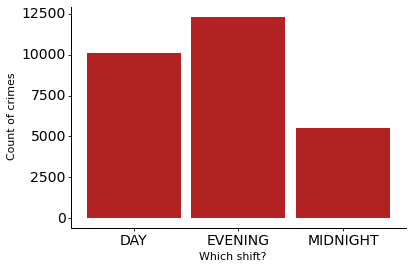

<ggplot: (8782306145118)>

In [4]:
## create a fig with the count of crimes by shift 

count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['CCN'].nunique()).reset_index()

plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
                                       y = 'CCN')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts

## method 1- (would avoid)- can left click and save image

## method 2 - write image
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)

# Activity 

1. The previous table you exported shows the COUNT of methods used by type of offense. Export a new Table to your LaTeX doc that contains the PROPORTION that each method represents for each offense (eg 80+% of homicides are with a gun as the method). Hint: you can use the normalize parameter within the pd.crosstab command for this: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html. Make sure the proportions for each offense type (eg homicides) sums to 1

2. Create the same shift versus count of crimes plot but just for Ward 2 (the ward where Georgetown is located). Save it as plot_shifts_ward2.png and import into your LaTeX memo/summarize with a caption

3. **Challenge exercise**: an analyst on a different team wants a breakdown of how the workload varies by shift. They want a separate figure showing the count of crimes on the y axis and shift on the x axis for each of the wards. Using a user-defined function that creates a plot for ONE WARD, write a separate bar plot for each WARD and make sure to programatically change the name of the plot filename so you know which is which. 

## Solution for 1

In [5]:
### crosstab and normalize by columns
method_v_offense_prop = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE,
                                   normalize = 'columns')
## printing result
method_v_offense_prop.T

## writing result
method_v_offense_prop.T.to_latex("methodoffense_prop.tex", 
                            index = True, caption = "Types of weapons in offenses",
                            label = "tab:method_offense_prop")

METHOD,GUN,KNIFE,OTHERS
OFFENSE,,,
ARSON,0.000000,0.000000,1.000000
ASSAULT W/DANGEROUS WEAPON,0.519018,0.292025,0.188957
BURGLARY,0.010402,0.001387,0.988211
HOMICIDE,0.857143,0.045918,0.096939
MOTOR VEHICLE THEFT,0.000921,0.000921,0.998158
ROBBERY,0.491738,0.061092,0.447171
SEX ABUSE,0.044944,0.056180,0.898876
THEFT F/AUTO,0.000363,0.000242,0.999396
THEFT/OTHER,0.000641,0.001556,0.997803


/tmp/ipykernel_157387/3600682475.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


## Solution for 2

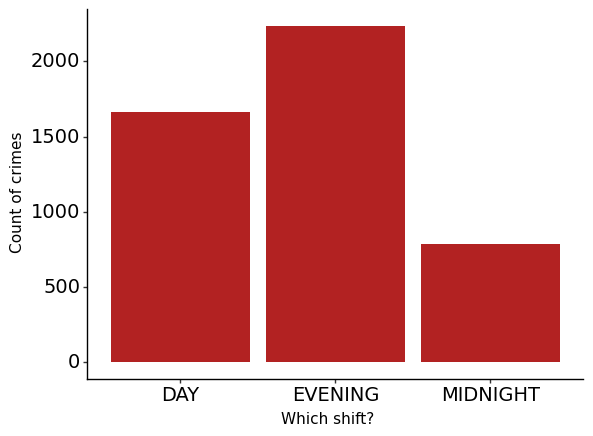

<ggplot: (8782306022376)>

In [6]:
## to above code, i add a grouping variable by ward
count_byshift_byw = pd.DataFrame(dc_crim_2020.groupby(['SHIFT', 'WARD'])['CCN'].nunique()).reset_index()


## same plot
plot_shifts_w2 = (ggplot(count_byshift_byw[count_byshift_byw.WARD == 2], aes(x = 'SHIFT', 
                                       y = 'CCN')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts_w2

## save image
plot_shifts_w2.save("plot_shifts_w2.png", 
                width = 12,
                height = 8,
                verbose = False)

## Solution for 3

In [7]:
def plot_save_onew(ward_num: int, 
                  input_agg: pd.DataFrame):
    
    ## pull out ward from input agg (could also 
    ## put the aggregation code here)
    one_w = count_byshift_byw[count_byshift_byw.WARD == ward_num]
    
    ## create plot
    plot_shifts_onew = (ggplot(one_w, aes(x = 'SHIFT', 
                                       y = 'CCN')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))

    ## save with ward number in name
    plot_shifts_onew.save("plot_shifts_ward_" + str(ward_num) + ".png", 
                width = 12,
                height = 8,
                verbose = False)
    

In [8]:
## executing with one
plot_save_onew(ward_num = 3, input_agg = count_byshift_byw)

## executing with all using list comprehension
[plot_save_onew(ward_num = i, input_agg = count_byshift_byw)
for i in count_byshift_byw.WARD.unique()]

[None, None, None, None, None, None, None, None]